In [354]:
import pandas as pd
import numpy as np

import us

import geopandas as gpd
import cartopy.crs as ccrs
import cartopy.feature as cf
import json
import fiona
from shapely.geometry import shape 

import tqdm

import geoviews as gv
import geoviews.feature as gf
import geoviews.tile_sources as gts
import xarray as xr

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from multiprocessing import Pool
num_partitions = 10 
num_cores = 7 

gv.extension('matplotlib')
%output size=150
%config InlineBackend.figure_format = 'retina'    

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

# Hot Congressional Public Lands Races
by: [Tony Cannistra](http://tonycannistra.com)

---

The general idea here is to identify whether there are congressional districts which both contain large swaths of valuable public land resources and have an interesting congressional race going on this November. 

To do this we're combining three data sources: 

1. [Congressional District Boundaries](https://www.census.gov/geo/maps-data/data/cbf/cbf_cds.html) from the Census
2. Protected Lands from the Protected Planet [World Database on Protected Areas](https://www.protectedplanet.net/c/world-database-on-protected-areas)
3. Election outcome [forecasts](https://projects.fivethirtyeight.com/2018-midterm-election-forecast/house/) from FiveThirtyEight

# 1. Inspect Public Lands Data
Lots of invalid geometries to deal with here. 

In [2]:
layer_file = "data/wdpa-verified/"
collection = list(fiona.open(layer_file,'r'))
df1 = pd.DataFrame(collection)

def isvalid(geom):
    try:
        shape(geom)
        return 1
    except:
        return 0
df1['isvalid'] = df1['geometry'].apply(lambda x: isvalid(x))
df1 = df1[df1['isvalid'] == 1]
collection = json.loads(df1.to_json(orient='records'))


In [5]:
usa_polys = gpd.GeoDataFrame.from_features(collection)
usa_polys.crs = {"init" : 'epsg:4326'}


In [304]:
usa_polys.MANG_AUTH.value_counts().head(10)

Non-Governmental Organization             6663
Other or Unknown State Land               2918
Natural Resources Conservation Service    2615
State Department of Conservation          2592
Private                                   2440
State Fish and Wildlife                   2397
County Land                               1900
State Department of Natural Resources     1771
Unknown                                   1526
City Land                                 1508
Name: MANG_AUTH, dtype: int64

**How to filter this**?

* Remove private?
* Remove Marine? [yes, below]

# Find Overlaps with Congressional Districts

In [10]:
districts = gpd.read_file('data/cb_2017_us_cd115_500k/')
districts['state'] = [str(us.states.lookup(r.STATEFP)) for i, r in districts.iterrows()]

Hella slow so need to parallel. Still takes about ~5-10 min because one district blocks. 

In [99]:
def parallel_apply(df, func):
    df_split = np.array_split(df, num_partitions)
    pool = Pool(num_cores)
    ans = pool.map(func, df_split)
    pool.close()
    pool.join()
    return ans

In [103]:
def get_poly_overlaps(district_part):
    district_id_matches = []
    for i, district in district_part.iterrows():
        poly = district.geometry
        possible_matches_index = list(usa_polys.sindex.intersection(poly.bounds))
        possible_matches = usa_polys.iloc[possible_matches_index]
        precise_matches = possible_matches[possible_matches.intersects(poly)]
        district_id_matches.append(precise_matches.index)
    print('chunk done')
    return((district_part, district_id_matches))

In [104]:
answers = parallel_apply(districts, get_poly_overlaps)

chunk done
chunk done
chunk done
chunk done
chunk done
chunk done
chunk done
chunk done
chunk done
chunk done


In [305]:
answers[0][0].head()

,STATEFP,CD115FP,AFFGEOID,GEOID,LSAD,CDSESSN,ALAND,AWATER,geometry,state,publand-matches,publand_idxs
0,13,09,5001500US1309,1309,C2,115,13497964615,411754565,"POLYGON ((-84.65622499999999 34.730984, -84.65...",Georgia,"[23120, 29585, 3704, 1536, 30613, 30099, 21171...","[13511, 23120, 29585, 3704, 1536, 30613, 30099..."
1,19,04,5001500US1904,1904,C2,115,58937921470,264842664,"POLYGON ((-96.63970399999999 42.737071, -96.63...",Iowa,"[12405, 12225, 13004, 32361, 10546, 24579, 253...","[12405, 11078, 33597, 11682, 12225, 13004, 323..."
2,17,10,5001500US1710,1710,C2,115,777307694,31695461,"POLYGON ((-88.19882 42.41557, -88.198601 42.41...",Illinois,"[4124, 25282, 21765, 17296, 27709, 26062, 9300...","[10313, 9535, 17, 4124, 25282, 21765, 9404, 17..."
3,55,05,5001500US5505,5505,C2,115,4897561248,165577272,"POLYGON ((-89.013578 42.84928499999999, -89.01...",Wisconsin,"[11465, 11979, 32859, 5433, 32779, 5398, 12078...","[12158, 29840, 29871, 5753, 31609, 11752, 2759..."
4,49,04,5001500US4904,4904,C2,115,6603536749,374114296,"POLYGON ((-112.329836 39.591316, -112.302599 3...",Utah,"[31245, 31250, 24889, 24881, 24888, 17661, 304...","[3881, 31245, 31250, 3287, 24889, 24881, 24888..."


In [124]:
# concatenate chunks together. 
chunks = []
for chunk in answers:
    chunk[0]['publand_idxs'] = [list(i) for i in chunk[1]]
    chunks.append(chunk[0])

In [125]:
districts_with_ids = pd.concat(chunks)

In [306]:
districts_with_ids.head()

,STATEFP,CD115FP,AFFGEOID,GEOID,LSAD,CDSESSN,ALAND,AWATER,geometry,state,publand_idxs
0,13,09,5001500US1309,1309,C2,115,13497964615,411754565,"POLYGON ((-84.65622499999999 34.730984, -84.65...",Georgia,"[13511, 23120, 29585, 3704, 1536, 30613, 30099..."
1,19,04,5001500US1904,1904,C2,115,58937921470,264842664,"POLYGON ((-96.63970399999999 42.737071, -96.63...",Iowa,"[12405, 11078, 33597, 11682, 12225, 13004, 323..."
2,17,10,5001500US1710,1710,C2,115,777307694,31695461,"POLYGON ((-88.19882 42.41557, -88.198601 42.41...",Illinois,"[10313, 9535, 17, 4124, 25282, 21765, 9404, 17..."
3,55,05,5001500US5505,5505,C2,115,4897561248,165577272,"POLYGON ((-89.013578 42.84928499999999, -89.01...",Wisconsin,"[12158, 29840, 29871, 5753, 31609, 11752, 2759..."
4,49,04,5001500US4904,4904,C2,115,6603536749,374114296,"POLYGON ((-112.329836 39.591316, -112.302599 3...",Utah,"[3881, 31245, 31250, 3287, 24889, 24881, 24888..."


In [128]:
# save it
with open("data/districts-intersects.geojson", 'w') as gj:
    gj.write(districts_with_ids.to_json())

In [131]:
districts_with_ids.columns

Index(['STATEFP', 'CD115FP', 'AFFGEOID', 'GEOID', 'LSAD', 'CDSESSN', 'ALAND',
       'AWATER', 'geometry', 'state', 'publand_idxs'],
      dtype='object')

## Examine Example Results

/Users/tony/miniconda3/envs/test-geo/lib/python3.6/site-packages/matplotlib/__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)
/Users/tony/miniconda3/envs/test-geo/lib/python3.6/site-packages/matplotlib/__init__.py:855: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
/Users/tony/miniconda3/envs/test-geo/lib/python3.6/site-packages/matplotlib/__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)
/Users/tony/miniconda3/envs/test-geo/lib/python3.6/site-packages/matplotlib/__init__.py:855: MatplotlibDeprecationWarning: 
examples.directory is deprecated;

:Overlay
   .WMTS.I     :WMTS   [Longitude,Latitude]
   .Shape.I    :Shape   [Longitude,Latitude]   (Level)
   .Polygons.I :Polygons   [Longitude,Latitude]
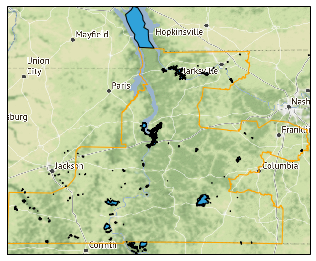

In [307]:
sample = districts_with_ids.sample()
publands = usa_polys.iloc[sample['publand_idxs'].values[0]]
gts.StamenTerrainRetina() * gv.Shape(sample.geometry.values[0]).options(facecolor='none', edgecolor='orange') * gv.Polygons(publands)

seems legit
---
Now let's pivot + label protected lands with congressional district it overlaps with. This doesn't currently deal with overlaps well (lands probably overlap with multiple districts)

In [155]:
idx_dist_map = {} 
for i, district in districts_with_ids.iterrows():
    for publand_idx in district['publand_idxs']:
        idx_dist_map[publand_idx] = i

In [172]:
districts.columns

Index(['STATEFP', 'CD115FP', 'AFFGEOID', 'GEOID', 'LSAD', 'CDSESSN', 'ALAND',
       'AWATER', 'geometry', 'state', 'publand-matches'],
      dtype='object')

In [156]:
usa_polys['cong_dist'] = pd.Series(idx_dist_map)

/Users/tony/miniconda3/envs/test-geo/lib/python3.6/site-packages/matplotlib/__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)
/Users/tony/miniconda3/envs/test-geo/lib/python3.6/site-packages/matplotlib/__init__.py:855: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
/Users/tony/miniconda3/envs/test-geo/lib/python3.6/site-packages/matplotlib/__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)
/Users/tony/miniconda3/envs/test-geo/lib/python3.6/site-packages/matplotlib/__init__.py:855: MatplotlibDeprecationWarning: 
examples.directory is deprecated;

:Overlay
   .WMTS.I     :WMTS   [Longitude,Latitude]
   .Polygons.I :Polygons   [Longitude,Latitude]   (cong_dist,NAME)
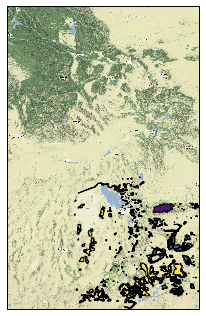

In [308]:
utah_polys = usa_polys[usa_polys.cong_dist.isin(districts[districts.state == "Utah"].index)]

gts.StamenTerrainRetina() * gv.Polygons(utah_polys, vdims=['cong_dist', 'NAME']).options(color_index='cong_dist', tools=['hover'])


## Compute amount of public land area per congressional district
To get an idea of the districts with the most public lands.

In [212]:
non_marine = usa_polys[usa_polys.MARINE == '0']
# get the district IDs that correspond to those districts with the highest area of public land
dist_area = non_marine.groupby('cong_dist').apply(lambda x: x.GIS_AREA.sum()).sort_values(ascending=False)
# store it
districts['publand_area'] = dist_area

In [342]:
districts_sorted = districts.sort_values(by='publand_area', ascending=False)
districts_sorted['publand_area_rank'] = np.arange(1, len(districts_sorted) + 1)

In [343]:
# create {STATE}-{XX} format for state-district id comparison
districts_sorted['_id'] = ["-".join([r.state, r.CD115FP]) for i, r in districts_sorted.iterrows()]

Text(0.5, 1.0, 'Top 25 Congressional Districts by Public Land')

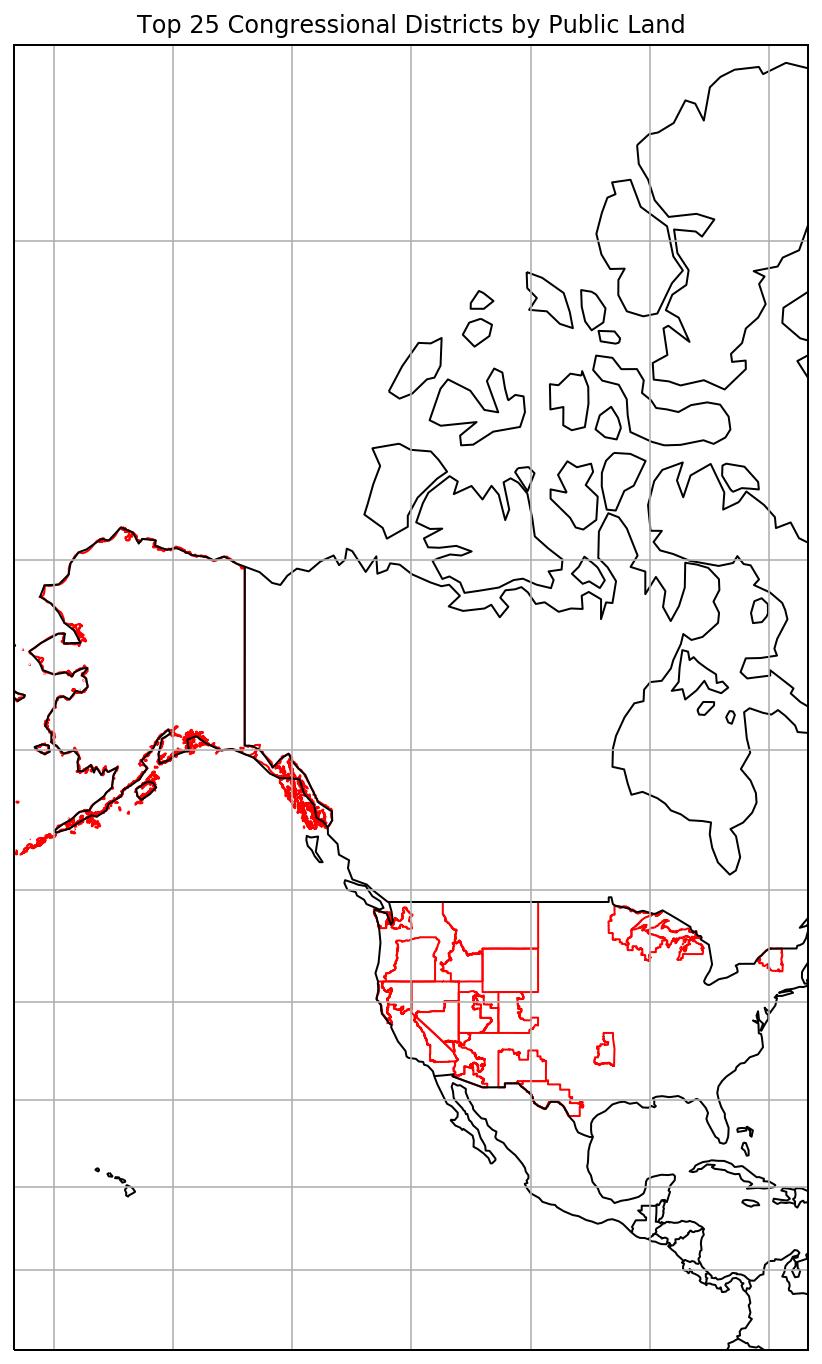

In [254]:
fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection = ccrs.Mercator().GOOGLE)
ax.set_extent([-170, -70, 0, 80])
ax.gridlines()
ax.add_geometries(districts_sorted.iloc[:25].geometry, crs = ccrs.PlateCarree(), edgecolor='red', facecolor='none'), 
ax.add_feature(cf.BORDERS)
ax.add_feature(cf.COASTLINE)
plt.title("Top 25 Congressional Districts by Public Land")

## How do politics look in these places?
Here's where the fivethirtyeight forecast comes in. Going to match the forecasts with these top 25 districts. 

Interesting Questions:

1. Who's projected to win in these districts?
2. Are any of them party switches? (*do we have these data?*)
3. Incumbents? 

In [344]:
top_districts = districts_sorted.iloc[:25]

In [356]:
district_forecast = pd.read_csv("https://projects.fivethirtyeight.com/congress-model-2018/house_district_forecast.csv")

In [357]:
#only deluxe/most recent forecast?
district_forecast = district_forecast[district_forecast.model == 'deluxe']
district_forecast = district_forecast[district_forecast.forecastdate == district_forecast.forecastdate.max()]

In [358]:
# id standardization
district_forecast['_id'] = ["{}-{:02d}".format(us.states.lookup(r.state), r.district) for i, r in district_forecast.iterrows()]

In [359]:
district_forecast.columns

Index(['forecastdate', 'state', 'district', 'special', 'candidate', 'party',
       'incumbent', 'model', 'win_probability', 'voteshare', 'p10_voteshare',
       'p90_voteshare', '_id'],
      dtype='object')

In [360]:
top_forecast = district_forecast[district_forecast._id.isin(top_districts['_id'])]

In [402]:
# who's likely to win in each of these high-value districts?
likely_winners = top_forecast[top_forecast.forecastdate == top_forecast.forecastdate.max()].groupby('_id').apply(lambda x: x[x.win_probability == x.win_probability.max()])
likely_winners

,,forecastdate,state,district,special,candidate,party,incumbent,model,win_probability,voteshare,p10_voteshare,p90_voteshare,_id
_id,,,,,,,,,,,,,,
Arizona-03,184581,2018-10-29,AZ,3,NaN,Raul Grijalva,D,True,deluxe,0.9999,69.39,64.32,74.42,Arizona-03
Arizona-04,184583,2018-10-29,AZ,4,NaN,Paul A. Gosar,R,True,deluxe,0.9997,62.61,57.72,67.45,Arizona-04
California-01,184596,2018-10-29,CA,1,NaN,Doug LaMalfa,R,True,deluxe,0.9261,56.00,50.70,61.25,California-01
California-02,184598,2018-10-29,CA,2,NaN,Jared Huffman,D,True,deluxe,1.0000,80.73,76.62,84.84,California-02
California-08,184610,2018-10-29,CA,8,NaN,Paul Cook,R,True,deluxe,0.9660,60.09,53.02,67.22,California-08
Colorado-03,184708,2018-10-29,CO,3,NaN,Scott Tipton,R,True,deluxe,0.7375,50.26,44.87,55.62,Colorado-03
Idaho-02,184834,2018-10-29,ID,2,NaN,Mike Simpson,R,True,deluxe,0.9994,63.89,58.99,68.77,Idaho-02
Michigan-01,184989,2018-10-29,MI,1,NaN,Jack Bergman,R,True,deluxe,0.9111,55.44,50.27,60.66,Michigan-01
Minnesota-08,185042,2018-10-29,MN,8,NaN,Pete Stauber,R,False,deluxe,0.8134,50.99,46.08,55.89,Minnesota-08


In [403]:
# are any non-incumbents? These might represent the interesting races. 
nonIncumbentLikelyWinners = likely_winners[~likely_winners.incumbent]
nonIncumbentLikelyWinners

,,forecastdate,state,district,special,candidate,party,incumbent,model,win_probability,voteshare,p10_voteshare,p90_voteshare,_id
_id,,,,,,,,,,,,,,
Minnesota-08,185042,2018-10-29,MN,8,NaN,Pete Stauber,R,False,deluxe,0.8134,50.99,46.08,55.89,Minnesota-08
Nevada-03,185177,2018-10-29,NV,3,NaN,Susie Lee,D,False,deluxe,0.7782,49.81,45.13,54.43,Nevada-03
Nevada-04,185180,2018-10-29,NV,4,NaN,Steven A. Horsford,D,False,deluxe,0.8376,50.77,45.58,55.93,Nevada-04
New Mexico-02,185167,2018-10-29,NM,2,NaN,Yvette Herrell,R,False,deluxe,0.5475,50.37,46.33,54.43,New Mexico-02
Washington-08,185546,2018-10-29,WA,8,NaN,Kim Schrier,D,False,deluxe,0.5662,50.54,46.27,54.81,Washington-08


In [404]:
# add ranking information re: how much publand is in each district
nonIncumbentLikelyWinners.index

MultiIndex(levels=[['Arizona-03', 'Arizona-04', 'California-01', 'California-02', 'California-08', 'Colorado-03', 'Idaho-02', 'Michigan-01', 'Minnesota-08', 'Nevada-02', 'Nevada-03', 'Nevada-04', 'New Mexico-02', 'New York-21', 'Oklahoma-02', 'Oregon-02', 'Texas-23', 'Utah-02', 'Utah-03', 'Washington-06', 'Washington-08', 'Wisconsin-07'], [184581, 184583, 184596, 184598, 184610, 184708, 184834, 184989, 185042, 185167, 185175, 185177, 185180, 185227, 185283, 185296, 185457, 185497, 185500, 185542, 185546, 185565]],
           labels=[[8, 10, 11, 12, 20], [8, 11, 12, 9, 20]],
           names=['_id', None])

In [395]:
nonIncumbentLikelyWinners = pd.merge(nonIncumbentLikelyWinners, 
                                     top_districts[top_districts._id.isin(nonIncumbentLikelyWinners.index.get_level_values(0))], 
                                     left_on = '_id', 
                                     right_on = "_id")

In [399]:
top_districts.columns

Index(['STATEFP', 'CD115FP', 'AFFGEOID', 'GEOID', 'LSAD', 'CDSESSN', 'ALAND',
       'AWATER', 'geometry', 'state', 'publand-matches', 'publand_area',
       'publand_area_rank', '_id'],
      dtype='object')

In [405]:
likely_winners = pd.merge(likely_winners, 
                          top_districts,
                          left_on = '_id', 
                          right_on = "_id")
likely_winners

/Users/tony/miniconda3/envs/test-geo/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3267: FutureWarning: '_id' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  exec(code_obj, self.user_global_ns, self.user_ns)


,forecastdate,state_x,district,special,candidate,party,incumbent,model,win_probability,voteshare,...,GEOID,LSAD,CDSESSN,ALAND,AWATER,geometry,state_y,publand-matches,publand_area,publand_area_rank
0,2018-10-29,AZ,3,NaN,Raul Grijalva,D,True,deluxe,0.9999,69.39,...,0403,C2,115,40632659377,8411270,"POLYGON ((-114.816294 32.508038, -114.814321 3...",Arizona,"[4101, 340, 4672, 4026, 1319, 3662, 3801, 2448...",14087.689696,13
1,2018-10-29,AZ,4,NaN,Paul A. Gosar,R,True,deluxe,0.9997,62.61,...,0404,C2,115,85987712579,504274113,"POLYGON ((-114.753196 36.089513, -114.749534 3...",Arizona,"[3442, 2412, 2739, 3300, 31351, 4434, 1302, 27...",27846.402487,7
2,2018-10-29,CA,1,NaN,Doug LaMalfa,R,True,deluxe,0.9261,56.00,...,0601,C2,115,72746743500,1948066328,"POLYGON ((-123.718448 41.59796499999999, -123....",California,"[7767, 33599, 7873, 3098, 8314, 8308, 3984, 79...",8310.690526,21
3,2018-10-29,CA,2,NaN,Jared Huffman,D,True,deluxe,1.0000,80.73,...,0602,C2,115,33546450051,4122300212,"(POLYGON ((-122.446316 37.861046, -122.441271 ...",California,"[31511, 7663, 7756, 7852, 7726, 7854, 2704, 28...",7794.271539,24
4,2018-10-29,CA,8,NaN,Paul Cook,R,True,deluxe,0.9660,60.09,...,0608,C2,115,85126844954,450306547,"POLYGON ((-119.648938 38.289121, -119.644575 3...",California,"[7600, 30648, 1882, 7862, 27544, 33201, 22491,...",47890.785185,5
5,2018-10-29,CO,3,NaN,Scott Tipton,R,True,deluxe,0.7375,50.26,...,0803,C2,115,128801473805,388035363,"POLYGON ((-109.060253 38.599328, -109.059541 3...",Colorado,"[27889, 23753, 22647, 31361, 1311, 3396, 3285,...",22556.065422,8
6,2018-10-29,ID,2,NaN,Mike Simpson,R,True,deluxe,0.9994,63.89,...,1602,C2,115,111951314468,1081555671,"POLYGON ((-116.334486 43.662895, -116.327967 4...",Idaho,"[26979, 3393, 7401, 26978, 7392, 26981, 26980,...",11356.341468,15
7,2018-10-29,MI,1,NaN,Jack Bergman,R,True,deluxe,0.9111,55.44,...,2601,C2,115,64823095449,75783678613,"(POLYGON ((-83.217371 45.05406199999999, -83.2...",Michigan,"[21223, 931, 21321, 20790, 19237, 21555, 5454,...",8677.661476,17
8,2018-10-29,MN,8,NaN,Pete Stauber,R,False,deluxe,0.8134,50.99,...,2708,C2,115,72279889700,12450296907,"(POLYGON ((-89.59205799999999 47.966683, -89.5...",Minnesota,"[2955, 10757, 12781, 2099, 12782, 4123, 2629, ...",8505.205201,18
9,2018-10-29,NV,2,NaN,Mark Amodei,R,True,deluxe,0.9741,58.83,...,3202,C2,115,144597298061,1316053447,"POLYGON ((-120.005743 39.22866399999999, -120....",Nevada,"[25128, 2194, 735, 5076, 31824, 1639, 721, 295...",15565.487357,10


In [380]:
nonIncumbentLikelyWinners

,forecastdate,state_x,district,special,candidate,party,incumbent,model,win_probability,voteshare,...,GEOID,LSAD,CDSESSN,ALAND,AWATER,geometry,state_y,publand-matches,publand_area,publand_area_rank
2,2018-10-29,NV,4,NaN,Steven A. Horsford,D,False,deluxe,0.8376,50.77,...,3204,C2,115,132082704605,628524273,"POLYGON ((-119.439816 38.860655, -119.439534 3...",Nevada,"[17084, 19591, 754, 1899, 3498, 3696, 4578, 15...",61723.759532,2
3,2018-10-29,NM,2,NaN,Yvette Herrell,R,False,deluxe,0.5475,50.37,...,3502,C2,115,185819783587,409896310,"POLYGON ((-109.050173 31.480004, -109.049843 3...",New Mexico,"[24044, 7489, 2136, 509, 22479, 33606, 33602, ...",16584.535377,9
4,2018-10-29,WA,8,NaN,Kim Schrier,D,False,deluxe,0.5662,50.54,...,5308,C2,115,19061011206,370370438,"POLYGON ((-122.560436 46.933457, -122.55648 46...",Washington,"[7095, 7186, 22171, 6971, 6794, 7248, 7147, 72...",15287.139492,11
1,2018-10-29,NV,3,NaN,Susie Lee,D,False,deluxe,0.7782,49.81,...,3203,C2,115,7378700262,102756400,"POLYGON ((-115.845763 36.095583, -115.845805 3...",Nevada,"[26106, 2140, 3392, 4059, 28649, 1308, 3792, 1...",12828.765463,14
0,2018-10-29,MN,8,NaN,Pete Stauber,R,False,deluxe,0.8134,50.99,...,2708,C2,115,72279889700,12450296907,"(POLYGON ((-89.59205799999999 47.966683, -89.5...",Minnesota,"[2955, 10757, 12781, 2099, 12782, 4123, 2629, ...",8505.205201,18



more to come ...

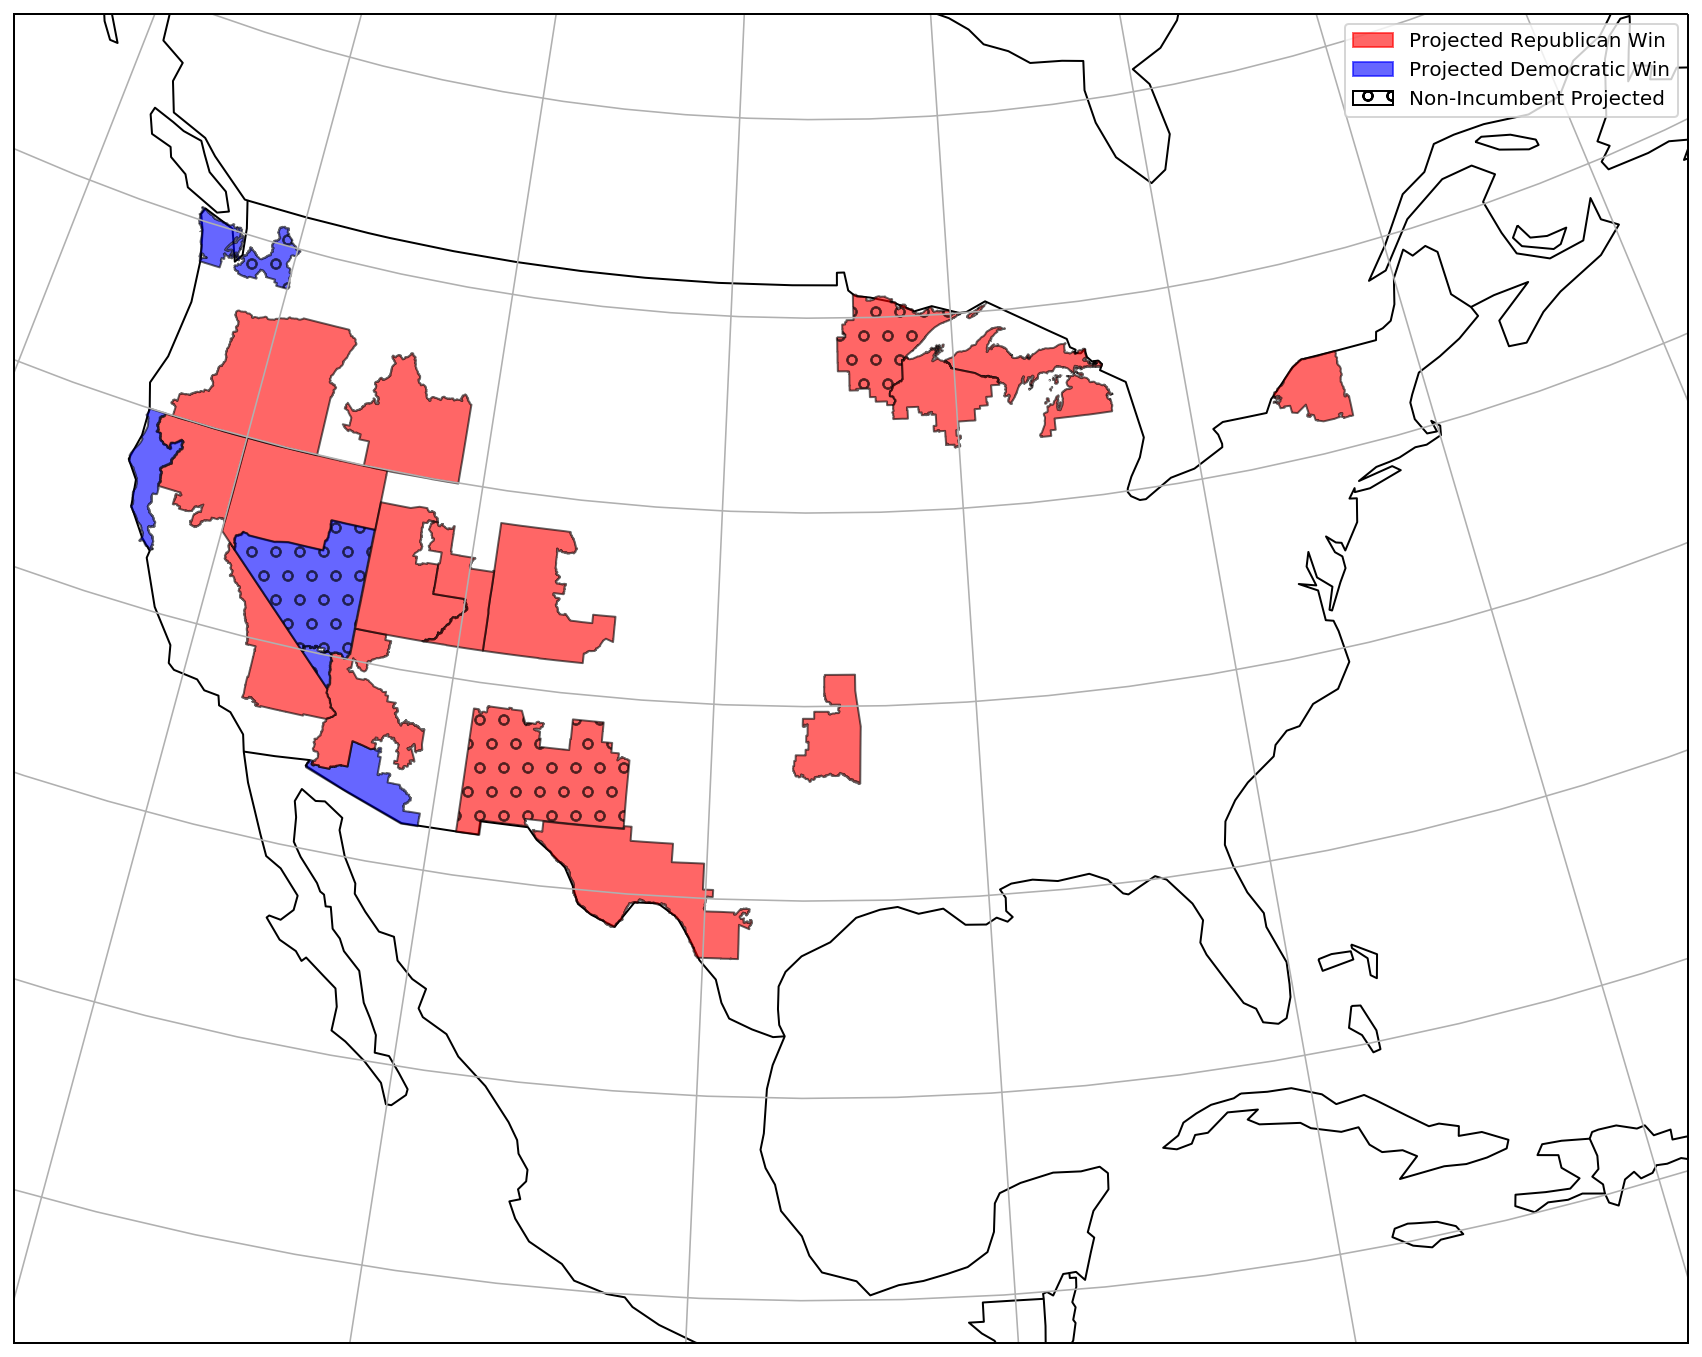

In [437]:
fig = plt.figure(figsize=(15,15))
ax = plt.axes(projection=ccrs.LambertConformal())
ax.set_extent([-120, -70, 15, 55])
ax.gridlines()
ax.add_feature(cf.COASTLINE)
ax.add_feature(cf.BORDERS)


for i, d in likely_winners.iterrows():
    hatch = None
    color = 'none'
    if(d.party == 'D'):
        color = 'blue'
    if(d.party == 'R'):
        color = 'red'
    if not d.incumbent:
        hatch = "o"
    ax.add_geometries([d.geometry.buffer(0)], crs=ccrs.PlateCarree(), alpha=0.6, edgecolor='black', facecolor=color, hatch=hatch)
    centroid_x, centroid_y = list(d.geometry.centroid.coords)[0]
    #ax.text(centroid_x, centroid_y, d._id, transform=ccrs.PlateCarree())

import matplotlib.patches as mpatches

red_patch = mpatches.Patch(color='red', label='Projected Republican Win', alpha=0.6)
blue_patch = mpatches.Patch(color='blue', label='Projected Democratic Win', alpha=0.6)
hatch_patch = mpatches.Patch(edgecolor='black', facecolor='none', hatch="o", label="Non-Incumbent Projected")
plt.legend(handles=[red_patch, blue_patch, hatch_patch])

In [429]:
list(likely_winners.iloc[0].geometry.centroid.coords)[0]

(-112.44362390609562, 32.36600487835212)